In [3]:
#Analysis of the game of Thrones Books

import pandas as pd
import networkx as nx
# Reading in datasets/book1.csv
book1 = pd.read_csv('datasets/book1.csv')
head = [book1 for i in range(5)]
print(head)

[                              Source              Target        Type  weight  \
0                     Addam-Marbrand     Jaime-Lannister  Undirected       3   
1                     Addam-Marbrand     Tywin-Lannister  Undirected       6   
2                  Aegon-I-Targaryen  Daenerys-Targaryen  Undirected       5   
3                  Aegon-I-Targaryen        Eddard-Stark  Undirected       4   
4    Aemon-Targaryen-(Maester-Aemon)      Alliser-Thorne  Undirected       4   
..                               ...                 ...         ...     ...   
679                 Tyrion-Lannister         Willis-Wode  Undirected       4   
680                 Tyrion-Lannister               Yoren  Undirected      10   
681                  Tywin-Lannister               Varys  Undirected       4   
682                  Tywin-Lannister         Walder-Frey  Undirected       8   
683                     Waymar-Royce     Will-(prologue)  Undirected      18   

     book  
0       1  
1       1  
2 

In [4]:
# Creating an empty graph object
G_book1 = nx.Graph()

In [5]:
for _, edge in book1.iterrows():
    G_book1.add_edge(edge['Source'], edge['Target'], weight=edge['weight'])

In [7]:
# Creating a list of networks for all the books

books = [G_book1]
book_fnames = ['datasets/book2.csv', 'datasets/book3.csv', 'datasets/book4.csv', 'datasets/book5.csv']
for book_fname in book_fnames:
    book = pd.read_csv(book_fname)
    G_book = nx.Graph()
    for _, edge in book.iterrows():
        G_book.add_edge(edge['Source'], edge['Target'], weight=edge['weight'])
    books.append(G_book)
    

In [8]:
# Calculating the degree centrality of book 1
deg_cen_book1 = nx.degree_centrality(books[0])

# Calculating the degree centrality of book 5
deg_cen_book5 = nx.degree_centrality(books[4])
# Sorting the dictionaries according to their degree centrality and storing the top 10
sorted_deg_cen_book1 = sorted(deg_cen_book1.items(), key=lambda x: x[1],reverse=True)[0:10]


In [9]:
# Sorting the dictionaries according to their degree centrality and storing the top 10
sorted_deg_cen_book5 = sorted(deg_cen_book5.items(), key=lambda x: x[1], reverse=True)[0:10]
print(sorted_deg_cen_book1)
print(sorted_deg_cen_book5)

[('Eddard-Stark', 0.3548387096774194), ('Robert-Baratheon', 0.2688172043010753), ('Tyrion-Lannister', 0.24731182795698928), ('Catelyn-Stark', 0.23118279569892475), ('Jon-Snow', 0.19892473118279572), ('Robb-Stark', 0.18817204301075272), ('Sansa-Stark', 0.18817204301075272), ('Bran-Stark', 0.17204301075268819), ('Cersei-Lannister', 0.16129032258064518), ('Joffrey-Baratheon', 0.16129032258064518)]
[('Jon-Snow', 0.1962025316455696), ('Daenerys-Targaryen', 0.18354430379746836), ('Stannis-Baratheon', 0.14873417721518986), ('Tyrion-Lannister', 0.10443037974683544), ('Theon-Greyjoy', 0.10443037974683544), ('Cersei-Lannister', 0.08860759493670886), ('Barristan-Selmy', 0.07911392405063292), ('Hizdahr-zo-Loraq', 0.06962025316455696), ('Asha-Greyjoy', 0.056962025316455694), ('Melisandre', 0.05379746835443038)]


According to degree centrality, the most important character in the first book is Eddard Stark but he drops off after the first book.

<class 'list'>


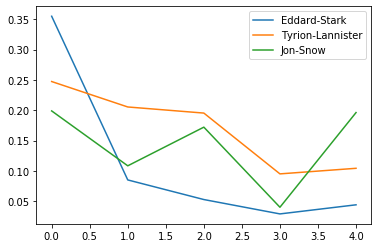

In [11]:
%matplotlib inline

evol = [nx.degree_centrality(book) for book in books]
print(type(evol))
# Creating a DataFrame from the list of degree centralities in all the books
degree_evol_df = pd.DataFrame.from_records(evol)
# Plotting the degree centrality evolution of Eddard-Stark, Tyrion-Lannister and Jon-Snow
#labeled as plot_a.png in Game of Thrones Books folder
degree_evol_df[['Eddard-Stark', 'Tyrion-Lannister', 'Jon-Snow']].plot()

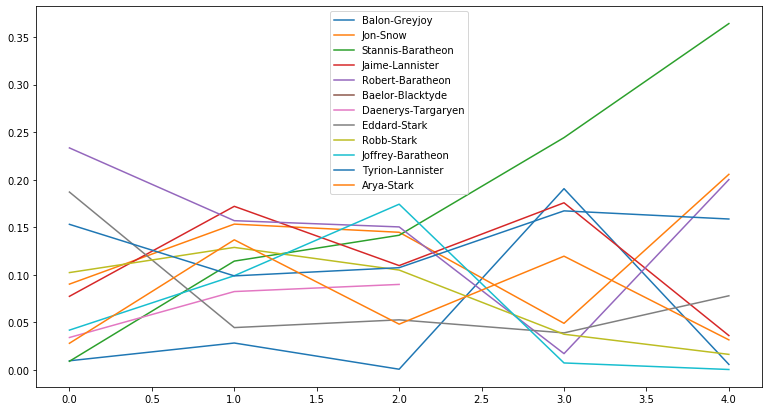

In [12]:
# Creating a list of betweenness centrality of all the books just like we did for degree centrality
evol = [nx.betweenness_centrality(book, weight='weight') for book in books]

# Making a DataFrame from the list
betweenness_evol_df = pd.DataFrame(evol)
# Finding the top 4 characters in every book
set_of_char = set()
for i in range(5):
    set_of_char |= set(list(betweenness_evol_df.T[i].sort_values(ascending=False)[0:4].index))
list_of_char = list(set_of_char)

# Plotting the evolution of the top characters 
#labelled as plot_b.png in Game of Thrones books folder
betweenness_evol_df[list_of_char].plot(figsize=(13, 7))


Stannis, Jon Snow, and Daenerys are the most important characters in the fifth book according to PageRank. Eddard Stark follows a similar curve but for degree centrality and betweenness centrality, Eddark is important in the first book but dies at the end of the first book.

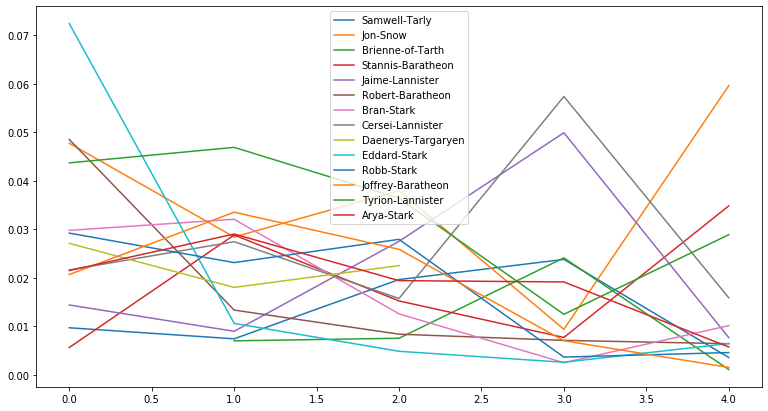

In [14]:
# Creating a list of pagerank of all the characters in all the books
evol = [nx.pagerank(book) for book in books]

# Making a DataFrame from the list
pagerank_evol_df = pd.DataFrame.from_records(evol)

# Finding the top 4 characters in every book
set_of_char = set()
for i in range(5):
    set_of_char |= set(list(pagerank_evol_df.T[i].sort_values(ascending=False)[0:4].index))
list_of_char = list(set_of_char)
# Plotting the top characters
#labelled as plot_c.png
pagerank_evol_df[list_of_char].plot(figsize=(13,7))

In [15]:
# Creating a list of pagerank, betweenness centrality, degree centrality of all the characters in the fifth book.
measures = [nx.pagerank(books[4]), 
            nx.betweenness_centrality(books[4], weight='weight'), 
            nx.degree_centrality(books[4])]

# Creating the correlation DataFrame
cor = pd.DataFrame.from_records(measures)

# Calculating the correlation
cor.T.corr()

,0,1,2
0,1.000000,0.793372,0.971493
1,0.793372,1.000000,0.833816
2,0.971493,0.833816,1.000000


In [18]:
# Finding the most important character in the fifth book according to degree centrality, betweenness centrality and pagerank.
p_rank, b_cent, d_cent = cor.idxmax(axis=1)

# Printing out the top character accoding to the three measures
for i, v in enumerate(cor.iloc[0,:]):
    if v ==max(cor.iloc[0,:]):
        print(i)
        
cor.iloc[:,143]

print(p_rank)
print(b_cent)
print(d_cent)
# Jon snow is the most important character

20
Jon-Snow
Stannis-Baratheon
Jon-Snow
